In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

#### This sounds pretty cool:

https://www.brown.edu/research/labs/mittleman/sites/brown.edu.research.labs.mittleman/files/uploads/lecture30_0.pdf

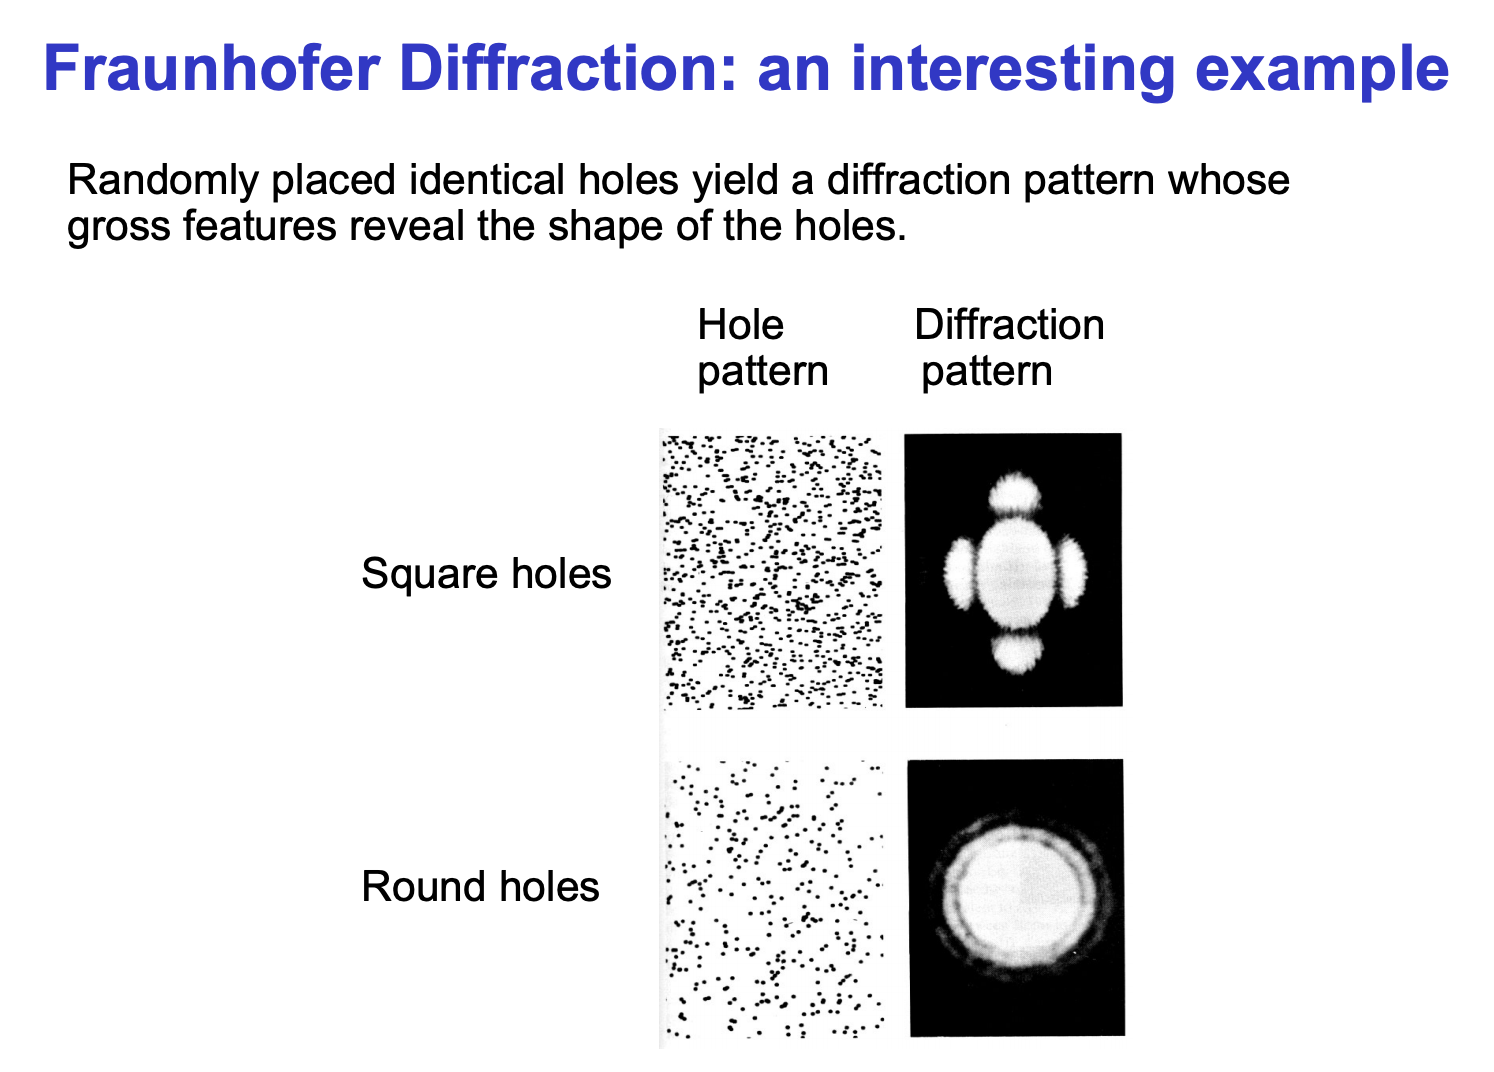</img>

Let's try it! We'll start with the example from our lecture notebook.

First, set up the matrix and create some functions. 

In [3]:
N = 2000

# Lower case letters correspond to the 1D array of coordinates in the two directions
x = np.linspace(-N/2,N/2,N+1)
y = np.linspace(-N/2,N/2,N+1)

# Upper case letters correspont to 2D coordinate matrices
X, Y = np.meshgrid(x, y)

global M

# We'll use global variables
def draw_circle(x0,y0,r):
    global M
    M += (X-x0)**2 + (Y-y0)**2 < r**2

def update(d=50, r=20, m = 1):
    global M
    M = np.zeros([N+1,N+1])
    M = M>0
    draw_circle(-d,-d,r)
    draw_circle(d,d,r)
    plt.subplots(figsize=(15,7))
    plt.subplot(121)
    zoom = 150
    n1 = int(N/2-zoom)
    n2 = int(N/2+zoom)
    ext = [x[n1], x[n2], y[n1], y[n2]]
    plt.imshow(M[n1:n2,n1:n2], extent=ext)
    Mt = np.abs(np.fft.fftshift(np.fft.fft2(M)))**2
    Mt /= np.max(Mt)
    plt.subplot(122)
    plt.imshow(Mt[n1:n2,n1:n2], extent=ext, vmax=m)
    
interact(update, d=(0,100,5), r=(1,100,5), m=(0.01,1,0.1))

interactive(children=(IntSlider(value=50, description='d', step=5), IntSlider(value=20, description='r', min=1…

<function __main__.update(d=50, r=20, m=1)>